In [3]:
from tensorflow import keras

keras.__version__

'2.2.4-tf'

In [12]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.model_selection import train_test_split

---
Data set source https://archive.ics.uci.edu/ml/datasets/Wine+Quality) 
* white wine / red wine CSV file
* input variables (X)
    * fixed acidity
    * volatile acidity
    * citric acid
    * residual sugar
    * chlorides
    * free sulfur dioxide
    * total sulfur dioxide
    * density
    * pH
    * sulphates
    * alcohol
* class label (Y)
   * quality (0~10, 0: Very poor, 10: Very excellent)
* no Missing Value

In [6]:
import pandas as pd
pd.__version__
pd.options.display.max_rows=15

In [11]:
import numpy as np
np.__version__

'1.19.2'

In [8]:
white_wine = pd.read_csv("winequality-white.csv")
red_wine = pd.read_csv("winequality-red.csv")

In [9]:
display(white_wine)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [10]:
display(red_wine)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25,67,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15,54,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17,60,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32,44,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39,51,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32,44,0.99547,3.57,0.71,10.2,5


In [44]:
#####################################################
def generate_data(df, t_r):
    Y = df['quality']
    df.drop(['quality'],axis=1)
    X_train, X_test, Y_train, Y_test = train_test_split(df, Y, test_size=1-t_r, random_state=124)

    
    return X_train.values, Y_train, X_test.values, Y_test
#####################################################

In [45]:
x_train, y_train, x_test, y_test = generate_data(white_wine, 0.7)

In [46]:
display(x_train)
display(y_train)
display(x_test)
display(y_test)

array([[ 6.3 ,  0.29,  0.28, ...,  0.56, 12.7 ,  8.  ],
       [ 8.8 ,  0.23,  0.35, ...,  0.49,  9.1 ,  6.  ],
       [ 7.6 ,  0.47,  0.49, ...,  0.51,  9.2 ,  5.  ],
       ...,
       [ 6.7 ,  0.27,  0.31, ...,  0.56,  9.6 ,  5.  ],
       [ 5.9 ,  0.26,  0.29, ...,  0.41, 11.4 ,  6.  ],
       [ 5.9 ,  0.21,  0.23, ...,  0.59, 10.9 ,  6.  ]])

3421    8
1902    6
1638    5
1334    6
3995    5
       ..
681     5
962     6
135     5
4764    6
4558    6
Name: quality, Length: 3428, dtype: int64

array([[ 7.  ,  0.24,  0.32, ...,  0.42, 11.2 ,  8.  ],
       [ 5.1 ,  0.33,  0.22, ...,  0.38, 12.5 ,  7.  ],
       [ 6.2 ,  0.33,  0.29, ...,  0.64,  9.5 ,  5.  ],
       ...,
       [ 8.  ,  0.26,  0.36, ...,  0.72, 11.6 ,  7.  ],
       [ 7.  ,  0.35,  0.24, ...,  0.38, 11.  ,  5.  ],
       [ 7.2 ,  0.33,  0.28, ...,  0.57, 10.6 ,  6.  ]])

1087    8
375     7
1385    5
4485    6
262     5
       ..
3323    6
4630    7
1060    7
2130    5
4708    6
Name: quality, Length: 1470, dtype: int64

In [66]:
import matplotlib.pyplot as mat

def visualization(history):
    mat.plot(history.history['acc'])
    mat.plot(history.history['val_acc'])
    mat.title('model accuracy graph')
    mat.xlabel('epoch')
    mat.ylabel('accuracy')
    mat.legend(['Train', 'val'], loc='upper left')
    mat.show()

    mat.plot(history.history['loss'])
    mat.plot(history.history['val_loss'])
    mat.title('model loss graph')
    mat.xlabel('epoch')
    mat.ylabel('loss')
    mat.legend(['Train', 'val'], loc='upper left')
    mat.show()
    
    return

In [92]:
import matplotlib.pyplot as mat

def visualization_red(history):
    mat.plot(history.history['acc'])
    mat.plot(history.history['val_acc'])
    mat.title('red wine model accuracy graph')
    mat.xlabel('epoch')
    mat.ylabel('accuracy')
    mat.legend(['Train', 'val'], loc='upper left')
    mat.show()

    mat.plot(history.history['loss'])
    mat.plot(history.history['val_loss'])
    mat.title('red wine model loss graph')
    mat.xlabel('epoch')
    mat.ylabel('loss')
    mat.legend(['Train', 'val'], loc='upper left')
    mat.show()
    
    return

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_49 (Flatten)         (None, 12)                0         
_________________________________________________________________
dense_104 (Dense)            (None, 32)                416       
_________________________________________________________________
dense_105 (Dense)            (None, 10)                330       
Total params: 746
Trainable params: 746
Non-trainable params: 0
_________________________________________________________________
Train on 2742 samples, validate on 686 samples
Epoch 1/10
 - 1s - loss: 10.0124 - acc: 0.3060 - val_loss: 4.3755 - val_acc: 0.4373
Epoch 2/10
 - 0s - loss: 4.2517 - acc: 0.4435 - val_loss: 4.0690 - val_acc: 0.4927
Epoch 3/10
 - 0s - loss: 4.0745 - acc: 0.4876 - val_loss: 3.9652 - val_acc: 0.5452
Epoch 4/10
 - 0s - loss: 4.0459 - acc: 0.5011 - val_loss: 4.0002 - val_acc: 0.5306
Epoch 5/10
 - 0s - loss: 4.0

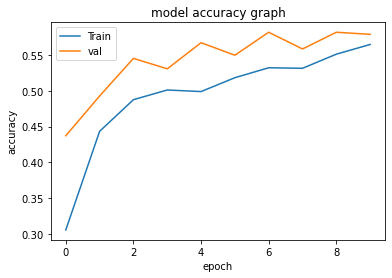

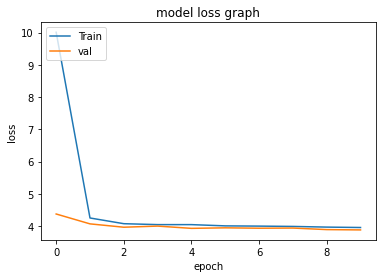

Train on 895 samples, validate on 224 samples
Epoch 1/10
 - 0s - loss: 2.4128 - acc: 0.5341 - val_loss: 1.5744 - val_acc: 0.4911
Epoch 2/10
 - 0s - loss: 1.5146 - acc: 0.5073 - val_loss: 1.3866 - val_acc: 0.5312
Epoch 3/10
 - 0s - loss: 1.1944 - acc: 0.5430 - val_loss: 1.2676 - val_acc: 0.5536
Epoch 4/10
 - 0s - loss: 1.1062 - acc: 0.5966 - val_loss: 1.1876 - val_acc: 0.5491
Epoch 5/10
 - 0s - loss: 1.0411 - acc: 0.6291 - val_loss: 1.1199 - val_acc: 0.6027
Epoch 6/10
 - 0s - loss: 1.0166 - acc: 0.6324 - val_loss: 1.1193 - val_acc: 0.5893
Epoch 7/10
 - 0s - loss: 1.0069 - acc: 0.6380 - val_loss: 1.1344 - val_acc: 0.6205
Epoch 8/10
 - 0s - loss: 0.9969 - acc: 0.6402 - val_loss: 1.1234 - val_acc: 0.6295
Epoch 9/10
 - 0s - loss: 0.9680 - acc: 0.6860 - val_loss: 1.0747 - val_acc: 0.6250
Epoch 10/10
 - 0s - loss: 0.9731 - acc: 0.6514 - val_loss: 1.0686 - val_acc: 0.6161


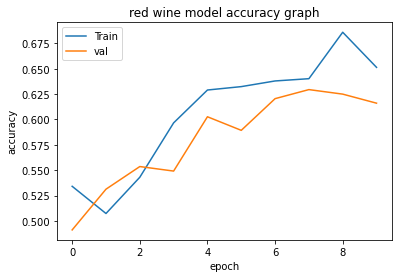

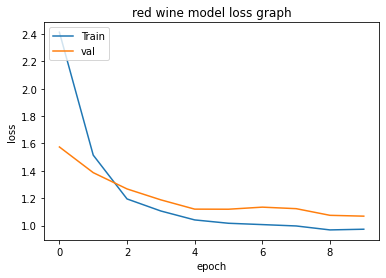

In [100]:
##########################################################
#basic model

X_train, Y_train, X_test, Y_test = generate_data(white_wine, 0.7)
X_train_red, Y_train_red, X_test_red, Y_test_red = generate_data(red_wine, 0.7)

y_train_cat = keras.utils.to_categorical(Y_train, 10)
y_train_cat_red = keras.utils.to_categorical(Y_train_red, 10)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[12,]))
model.add(keras.layers.Dense(32, activation="relu")) #node 32
model.add(keras.layers.Dense(10, activation="softmax")) #output

model.summary()

model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

history = model.fit(X_train, y_train_cat,batch_size=32,epochs=10,verbose=2,validation_split=0.2)

#visualization
visualization(history)

#red wine
history2 = model.fit(X_train_red, y_train_cat_red,batch_size=32,epochs=10,verbose=2,validation_split=0.2)
visualization_red(history2)
###########################################################

model improvement
    * ex) layer number, node number, Learning rate
    * ex) Dropout, Normalization 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_45 (Flatten)         (None, 12)                0         
_________________________________________________________________
dense_94 (Dense)             (None, 32)                416       
_________________________________________________________________
dense_95 (Dense)             (None, 10)                330       
Total params: 746
Trainable params: 746
Non-trainable params: 0
_________________________________________________________________
Train on 2742 samples, validate on 686 samples
Epoch 1/30
 - 1s - loss: 9.9002 - acc: 0.3147 - val_loss: 8.1617 - val_acc: 0.4650
Epoch 2/30
 - 0s - loss: 8.5441 - acc: 0.4354 - val_loss: 8.0943 - val_acc: 0.4679
Epoch 3/30
 - 0s - loss: 8.1404 - acc: 0.4322 - val_loss: 5.0551 - val_acc: 0.4475
Epoch 4/30
 - 0s - loss: 1.6093 - acc: 0.4063 - val_loss: 1.2665 - val_acc: 0.4767
Epoch 5/30
 - 0s - loss: 1.27

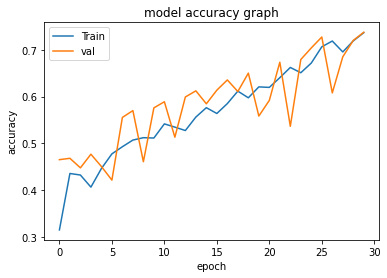

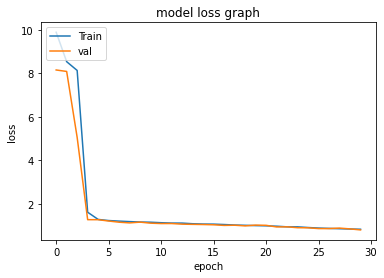

Train on 895 samples, validate on 224 samples
Epoch 1/30
 - 0s - loss: 0.8614 - acc: 0.7453 - val_loss: 0.9039 - val_acc: 0.7143
Epoch 2/30
 - 0s - loss: 0.7789 - acc: 0.7318 - val_loss: 0.8645 - val_acc: 0.7411
Epoch 3/30
 - 0s - loss: 0.7556 - acc: 0.7654 - val_loss: 0.8479 - val_acc: 0.7500
Epoch 4/30
 - 0s - loss: 0.7381 - acc: 0.7877 - val_loss: 0.8367 - val_acc: 0.7321
Epoch 5/30
 - 0s - loss: 0.7306 - acc: 0.7698 - val_loss: 0.8302 - val_acc: 0.7500
Epoch 6/30
 - 0s - loss: 0.7126 - acc: 0.7765 - val_loss: 0.8174 - val_acc: 0.7589
Epoch 7/30
 - 0s - loss: 0.7017 - acc: 0.7866 - val_loss: 0.8052 - val_acc: 0.7768
Epoch 8/30
 - 0s - loss: 0.6945 - acc: 0.8000 - val_loss: 0.7979 - val_acc: 0.8036
Epoch 9/30
 - 0s - loss: 0.6919 - acc: 0.8067 - val_loss: 0.7925 - val_acc: 0.7812
Epoch 10/30
 - 0s - loss: 0.6818 - acc: 0.8179 - val_loss: 0.7890 - val_acc: 0.7634
Epoch 11/30
 - 0s - loss: 0.6712 - acc: 0.8112 - val_loss: 0.7740 - val_acc: 0.7991
Epoch 12/30
 - 0s - loss: 0.6603 - acc:

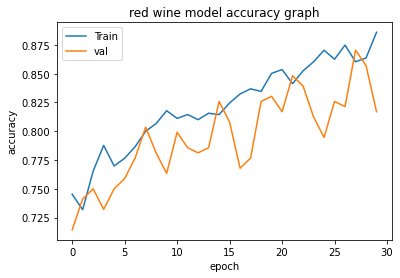

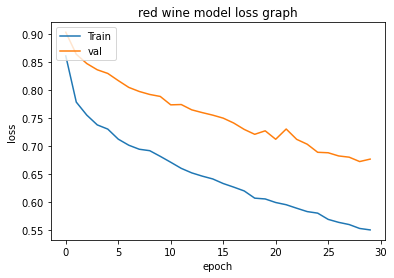

In [96]:
##########################################################
#hyper parameter
node = 32
epoch_num = 10
bsize = 32

#model_squ_epoch change epoch_num
epoch_num = 30
model_seq_epoch = keras.models.Sequential()
model_seq_epoch.add(keras.layers.Flatten(input_shape=[12,]))
model_seq_epoch.add(keras.layers.Dense(node, activation="relu")) #node 32
model_seq_epoch.add(keras.layers.Dense(10, activation="softmax")) #output

model_seq_epoch.summary()

model_seq_epoch.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

history = model_seq_epoch.fit(X_train, y_train_cat,batch_size=bsize,epochs=epoch_num,verbose=2,validation_split=0.2)

#visualization
visualization(history)

#red wine
history2 = model_seq_epoch.fit(X_train_red, y_train_cat_red,batch_size=bsize,epochs=epoch_num,verbose=2,validation_split=0.2)
visualization_red(history2)
###########################################################

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_46 (Flatten)         (None, 12)                0         
_________________________________________________________________
dense_96 (Dense)             (None, 64)                832       
_________________________________________________________________
dense_97 (Dense)             (None, 10)                650       
Total params: 1,482
Trainable params: 1,482
Non-trainable params: 0
_________________________________________________________________
Train on 2742 samples, validate on 686 samples
Epoch 1/30
 - 1s - loss: 13.0294 - acc: 0.1251 - val_loss: 8.7714 - val_acc: 0.3338
Epoch 2/30
 - 0s - loss: 3.6923 - acc: 0.4201 - val_loss: 1.3748 - val_acc: 0.4796
Epoch 3/30
 - 0s - loss: 1.3141 - acc: 0.4438 - val_loss: 1.2697 - val_acc: 0.3819
Epoch 4/30
 - 0s - loss: 1.2049 - acc: 0.4931 - val_loss: 1.1607 - val_acc: 0.5962
Epoch 5/30
 - 0s - loss:

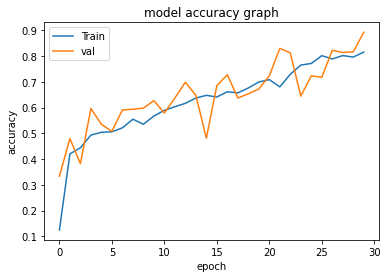

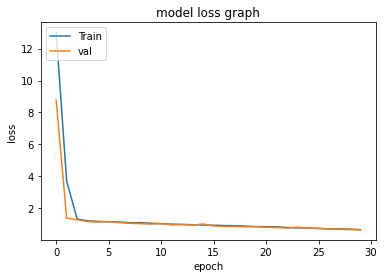

Train on 895 samples, validate on 224 samples
Epoch 1/30
 - 0s - loss: 0.7140 - acc: 0.7743 - val_loss: 0.7478 - val_acc: 0.7768
Epoch 2/30
 - 0s - loss: 0.5979 - acc: 0.8458 - val_loss: 0.7074 - val_acc: 0.8080
Epoch 3/30
 - 0s - loss: 0.5733 - acc: 0.8693 - val_loss: 0.6921 - val_acc: 0.8438
Epoch 4/30
 - 0s - loss: 0.5517 - acc: 0.8771 - val_loss: 0.6576 - val_acc: 0.8482
Epoch 5/30
 - 0s - loss: 0.5359 - acc: 0.8816 - val_loss: 0.6516 - val_acc: 0.8438
Epoch 6/30
 - 0s - loss: 0.5277 - acc: 0.8983 - val_loss: 0.6377 - val_acc: 0.8348
Epoch 7/30
 - 0s - loss: 0.5130 - acc: 0.8894 - val_loss: 0.6297 - val_acc: 0.8393
Epoch 8/30
 - 0s - loss: 0.5031 - acc: 0.8961 - val_loss: 0.6276 - val_acc: 0.8482
Epoch 9/30
 - 0s - loss: 0.4972 - acc: 0.9061 - val_loss: 0.6357 - val_acc: 0.8616
Epoch 10/30
 - 0s - loss: 0.4977 - acc: 0.9095 - val_loss: 0.6150 - val_acc: 0.8214
Epoch 11/30
 - 0s - loss: 0.4794 - acc: 0.9073 - val_loss: 0.5983 - val_acc: 0.8795
Epoch 12/30
 - 0s - loss: 0.4701 - acc:

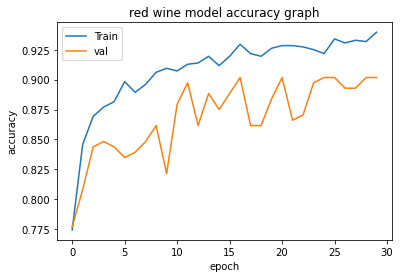

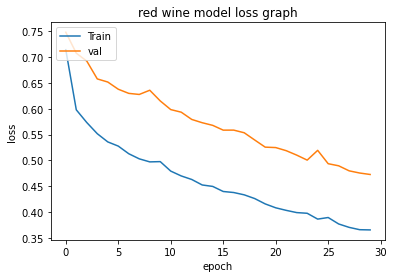

In [97]:
##########################################################
#model_squ_node change node 32 to 64
node = 64
model_squ_node = keras.models.Sequential()
model_squ_node.add(keras.layers.Flatten(input_shape=[12,]))
model_squ_node.add(keras.layers.Dense(node, activation="relu")) #node 32
model_squ_node.add(keras.layers.Dense(10, activation="softmax")) #output

model_squ_node.summary()

model_squ_node.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

history = model_squ_node.fit(X_train, y_train_cat,batch_size=bsize,epochs=epoch_num,verbose=2,validation_split=0.2)

#visualization
visualization(history)

#red wine
history2 = model_squ_node.fit(X_train_red, y_train_cat_red,batch_size=bsize,epochs=epoch_num,verbose=2,validation_split=0.2)
visualization_red(history2)
###########################################################

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_47 (Flatten)         (None, 12)                0         
_________________________________________________________________
dense_98 (Dense)             (None, 64)                832       
_________________________________________________________________
dense_99 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_100 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_101 (Dense)            (None, 10)                650       
Total params: 9,802
Trainable params: 9,802
Non-trainable params: 0
_________________________________________________________________
Train on 2742 samples, validate on 686 samples
Epoch 1/30
 - 1s - loss: 2.8186 - acc: 0.3727 - val_loss: 1.2792 - val_acc: 0.4810
Epoch 2/30

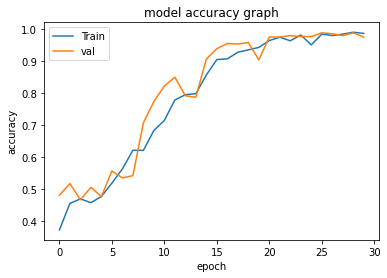

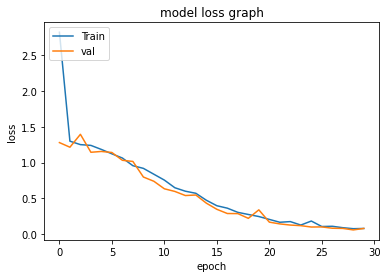

Train on 895 samples, validate on 224 samples
Epoch 1/30
 - 0s - loss: 0.2634 - acc: 0.9140 - val_loss: 0.1642 - val_acc: 0.9688
Epoch 2/30
 - 0s - loss: 0.1018 - acc: 0.9799 - val_loss: 0.1001 - val_acc: 0.9732
Epoch 3/30
 - 0s - loss: 0.0875 - acc: 0.9844 - val_loss: 0.1103 - val_acc: 0.9643
Epoch 4/30
 - 0s - loss: 0.0728 - acc: 0.9866 - val_loss: 0.0752 - val_acc: 0.9821
Epoch 5/30
 - 0s - loss: 0.0582 - acc: 0.9911 - val_loss: 0.0652 - val_acc: 0.9955
Epoch 6/30
 - 0s - loss: 0.0523 - acc: 0.9911 - val_loss: 0.0560 - val_acc: 0.9955
Epoch 7/30
 - 0s - loss: 0.0449 - acc: 0.9955 - val_loss: 0.0546 - val_acc: 0.9866
Epoch 8/30
 - 0s - loss: 0.0419 - acc: 0.9933 - val_loss: 0.0443 - val_acc: 0.9955
Epoch 9/30
 - 0s - loss: 0.0378 - acc: 0.9989 - val_loss: 0.0444 - val_acc: 0.9911
Epoch 10/30
 - 0s - loss: 0.0357 - acc: 0.9978 - val_loss: 0.0505 - val_acc: 0.9911
Epoch 11/30
 - 0s - loss: 0.0333 - acc: 0.9944 - val_loss: 0.0390 - val_acc: 1.0000
Epoch 12/30
 - 0s - loss: 0.0304 - acc:

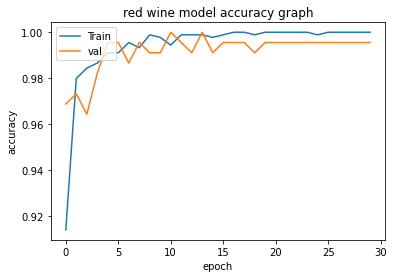

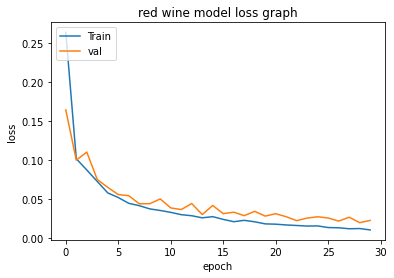

In [98]:
##########################################################
#model_squ_layer add 2 hidden layer
model_squ_layer = keras.models.Sequential()
model_squ_layer.add(keras.layers.Flatten(input_shape=[12,]))
model_squ_layer.add(keras.layers.Dense(node, activation="relu"))
model_squ_layer.add(keras.layers.Dense(node, activation="relu"))
model_squ_layer.add(keras.layers.Dense(node, activation="relu"))
model_squ_layer.add(keras.layers.Dense(10, activation="softmax")) #output

model_squ_layer.summary()

model_squ_layer.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

history = model_squ_layer.fit(X_train, y_train_cat,batch_size=bsize,epochs=epoch_num,verbose=2,validation_split=0.2)

#visualization
visualization(history)

#red wine
history2 = model_squ_layer.fit(X_train_red, y_train_cat_red,batch_size=bsize,epochs=epoch_num,verbose=2,validation_split=0.2)
visualization_red(history2)
###########################################################

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_54 (Flatten)         (None, 12)                0         
_________________________________________________________________
dense_122 (Dense)            (None, 64)                832       
_________________________________________________________________
batch_normalization_v1_19 (B (None, 64)                256       
_________________________________________________________________
activation_19 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_123 (Dense)            (None, 64)                4160      
_________________________________________________________________
batch_normalization_v1_20 (B (None, 64)                256       
_________________________________________________________________
activation_20 (Activation)   (None, 64)                0         
__________

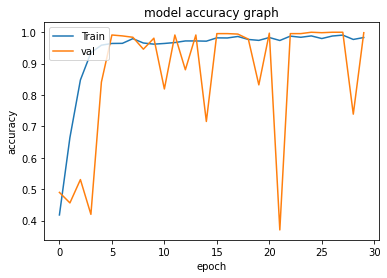

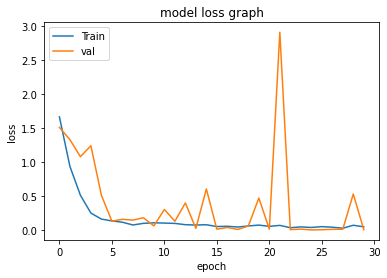

Train on 895 samples, validate on 224 samples
Epoch 1/30
 - 0s - loss: 0.2151 - acc: 0.9374 - val_loss: 0.7305 - val_acc: 0.8527
Epoch 2/30
 - 0s - loss: 0.0267 - acc: 0.9955 - val_loss: 0.0593 - val_acc: 1.0000
Epoch 3/30
 - 0s - loss: 0.0136 - acc: 0.9966 - val_loss: 0.0143 - val_acc: 1.0000
Epoch 4/30
 - 0s - loss: 0.0136 - acc: 0.9966 - val_loss: 0.0112 - val_acc: 1.0000
Epoch 5/30
 - 0s - loss: 0.0096 - acc: 1.0000 - val_loss: 0.0059 - val_acc: 1.0000
Epoch 6/30
 - 0s - loss: 0.0194 - acc: 0.9933 - val_loss: 0.0066 - val_acc: 1.0000
Epoch 7/30
 - 0s - loss: 0.0245 - acc: 0.9911 - val_loss: 0.0050 - val_acc: 1.0000
Epoch 8/30
 - 0s - loss: 0.0148 - acc: 0.9978 - val_loss: 0.0039 - val_acc: 1.0000
Epoch 9/30
 - 0s - loss: 0.0189 - acc: 0.9978 - val_loss: 0.0039 - val_acc: 1.0000
Epoch 10/30
 - 0s - loss: 0.0192 - acc: 0.9911 - val_loss: 0.0049 - val_acc: 1.0000
Epoch 11/30
 - 0s - loss: 0.0162 - acc: 0.9944 - val_loss: 0.0044 - val_acc: 1.0000
Epoch 12/30
 - 0s - loss: 0.0125 - acc:

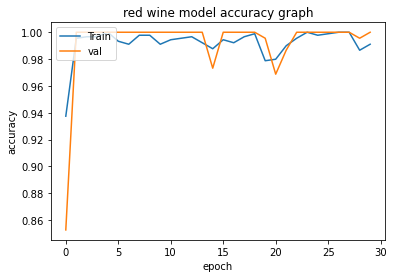

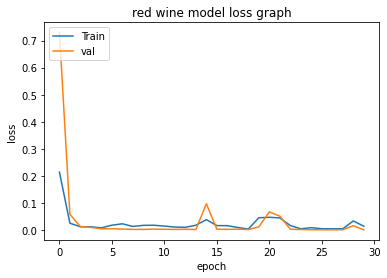

In [105]:
##########################################################
#model_squ_normal use batchnormalization
model_squ_normal = keras.models.Sequential()
model_squ_normal.add(keras.layers.Flatten(input_shape=[12,]))

model_squ_normal.add(keras.layers.Dense(node))
model_squ_normal.add(keras.layers.BatchNormalization())
model_squ_normal.add(keras.layers.Activation('relu'))
model_squ_normal.add(keras.layers.Dense(node))
model_squ_normal.add(keras.layers.BatchNormalization())
model_squ_normal.add(keras.layers.Activation('relu'))
model_squ_normal.add(keras.layers.Dense(node))
model_squ_normal.add(keras.layers.BatchNormalization())
model_squ_normal.add(keras.layers.Activation('relu'))

model_squ_normal.add(keras.layers.Dense(10, activation="softmax")) #output

model_squ_normal.summary()

model_squ_normal.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

history = model_squ_normal.fit(X_train, y_train_cat,batch_size=bsize,epochs=epoch_num,verbose=2,validation_split=0.2)

#visualization
visualization(history)

#red wine
history2 = model_squ_normal.fit(X_train_red, y_train_cat_red,batch_size=bsize,epochs=epoch_num,verbose=2,validation_split=0.2)
visualization_red(history2)
###########################################################

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_56 (Flatten)         (None, 12)                0         
_________________________________________________________________
dense_130 (Dense)            (None, 64)                832       
_________________________________________________________________
batch_normalization_v1_25 (B (None, 64)                256       
_________________________________________________________________
activation_25 (Activation)   (None, 64)                0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_131 (Dense)            (None, 64)                4160      
_________________________________________________________________
batch_normalization_v1_26 (B (None, 64)                256       
__________

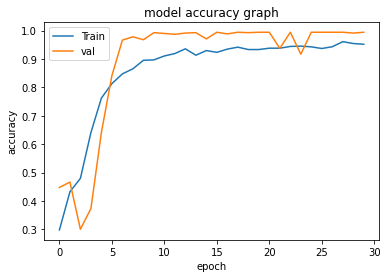

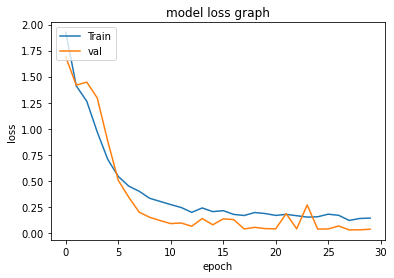

Train on 895 samples, validate on 224 samples
Epoch 1/30
 - 0s - loss: 0.2301 - acc: 0.9196 - val_loss: 0.0767 - val_acc: 0.9643
Epoch 2/30
 - 0s - loss: 0.1039 - acc: 0.9642 - val_loss: 0.0820 - val_acc: 0.9643
Epoch 3/30
 - 0s - loss: 0.0890 - acc: 0.9676 - val_loss: 0.0746 - val_acc: 0.9643
Epoch 4/30
 - 0s - loss: 0.0941 - acc: 0.9777 - val_loss: 0.0670 - val_acc: 0.9643
Epoch 5/30
 - 0s - loss: 0.1176 - acc: 0.9587 - val_loss: 0.0517 - val_acc: 0.9643
Epoch 6/30
 - 0s - loss: 0.1050 - acc: 0.9598 - val_loss: 0.0477 - val_acc: 0.9643
Epoch 7/30
 - 0s - loss: 0.0711 - acc: 0.9754 - val_loss: 0.0585 - val_acc: 0.9643
Epoch 8/30
 - 0s - loss: 0.0765 - acc: 0.9732 - val_loss: 0.0419 - val_acc: 0.9866
Epoch 9/30
 - 0s - loss: 0.0776 - acc: 0.9743 - val_loss: 0.0448 - val_acc: 0.9643
Epoch 10/30
 - 0s - loss: 0.0893 - acc: 0.9743 - val_loss: 0.0463 - val_acc: 0.9688
Epoch 11/30
 - 0s - loss: 0.0930 - acc: 0.9631 - val_loss: 0.0381 - val_acc: 0.9777
Epoch 12/30
 - 0s - loss: 0.1045 - acc:

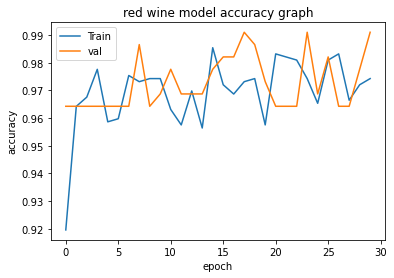

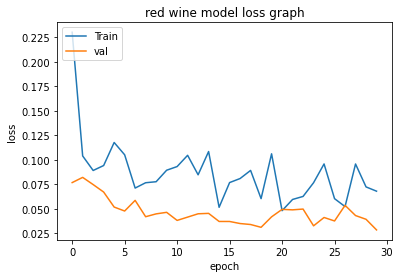

In [107]:
##########################################################
#model_squ_dout use drop out
model_squ_dout = keras.models.Sequential()
model_squ_dout.add(keras.layers.Flatten(input_shape=[12,]))

model_squ_dout.add(keras.layers.Dense(node))
model_squ_dout.add(keras.layers.BatchNormalization())
model_squ_dout.add(keras.layers.Activation('relu'))
model_squ_dout.add(keras.layers.Dropout(0.2))
model_squ_dout.add(keras.layers.Dense(node))
model_squ_dout.add(keras.layers.BatchNormalization())
model_squ_dout.add(keras.layers.Activation('relu'))
model_squ_dout.add(keras.layers.Dropout(0.2))
model_squ_dout.add(keras.layers.Dense(node))
model_squ_dout.add(keras.layers.BatchNormalization())
model_squ_dout.add(keras.layers.Activation('relu'))
model_squ_dout.add(keras.layers.Dropout(0.2))

model_squ_dout.add(keras.layers.Dense(10, activation="softmax")) #output

model_squ_dout.summary()

model_squ_dout.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

history = model_squ_dout.fit(X_train, y_train_cat,batch_size=bsize,epochs=epoch_num,verbose=2,validation_split=0.2)

#visualization
visualization(history)

#red wine
history2 = model_squ_dout.fit(X_train_red, y_train_cat_red,batch_size=bsize,epochs=epoch_num,verbose=2,validation_split=0.2)
visualization_red(history2)
###########################################################

In [151]:
##########################################################
#concatenate data frame
white_wine_temp = pd.read_csv("winequality-white.csv")
red_wine_temp = pd.read_csv("winequality-red.csv")

wine = pd.concat([white_wine_temp, red_wine_temp])

display(wine)
###########################################################

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_95 (Flatten)         (None, 12)                0         
_________________________________________________________________
dropout_73 (Dropout)         (None, 12)                0         
_________________________________________________________________
dense_249 (Dense)            (None, 10)                130       
Total params: 130
Trainable params: 130
Non-trainable params: 0
_________________________________________________________________
Train on 3637 samples, validate on 910 samples
Epoch 1/10
 - 3s - loss: 12.7461 - acc: 0.1114 - val_loss: 8.4972 - val_acc: 0.3813
Epoch 2/10
 - 0s - loss: 8.0628 - acc: 0.3434 - val_loss: 5.1932 - val_acc: 0.3143
Epoch 3/10
 - 0s - loss: 6.1014 - acc: 0.3187 - val_loss: 4.2744 - val_acc: 0.3110
Epoch 4/10
 - 0s - loss: 4.0099 - acc: 0.3060 - val_loss: 1.9570 - val_acc: 0.3714
Epoch 5/10
 - 0s - loss: 2.4

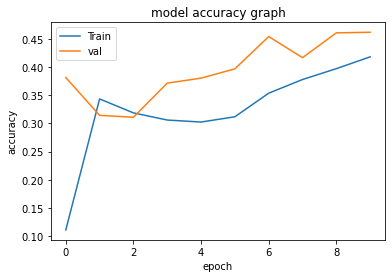

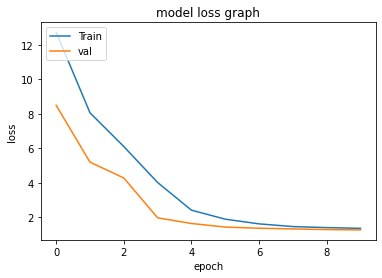

In [152]:
X_train_total, Y_train_total, X_test_total, Y_test_total = generate_data(wine, 0.7)
y_train_label = keras.utils.to_categorical(Y_train, 10)

model_final = keras.models.Sequential()
model_final.add(keras.layers.Flatten(input_shape=[12,]))

model.add(keras.layers.Dense(32, activation="relu"))
model_final.add(keras.layers.Dropout(0.2))

model_final.add(keras.layers.Dense(10, activation="softmax"))

model_final.summary()

model_final.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

history_total = model_final.fit(X_train_total, y_train_label,batch_size=32,epochs=10,verbose=2,validation_split=0.2)

visualization(history_total)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_90 (Flatten)         (None, 12)                0         
_________________________________________________________________
dense_236 (Dense)            (None, 64)                832       
_________________________________________________________________
batch_normalization_v1_67 (B (None, 64)                256       
_________________________________________________________________
activation_67 (Activation)   (None, 64)                0         
_________________________________________________________________
dropout_66 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_237 (Dense)            (None, 64)                4160      
_________________________________________________________________
batch_normalization_v1_68 (B (None, 64)                256       
__________

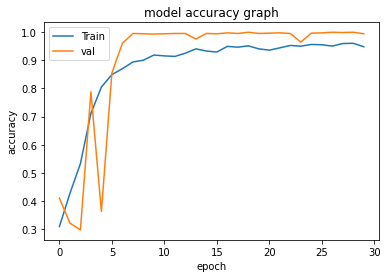

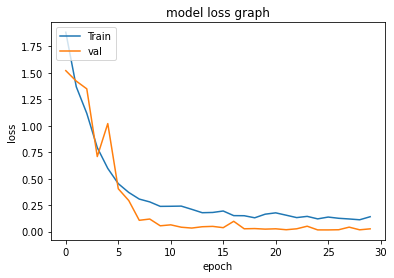

In [146]:
epoch = 30
node = 64

model_total = keras.models.Sequential()
model_total.add(keras.layers.Flatten(input_shape=[12,]))

model_total.add(keras.layers.Dense(node))
model_total.add(keras.layers.BatchNormalization())
model_total.add(keras.layers.Activation('relu'))
model_total.add(keras.layers.Dropout(0.2))
model_total.add(keras.layers.Dense(node))
model_total.add(keras.layers.BatchNormalization())
model_total.add(keras.layers.Activation('relu'))
model_total.add(keras.layers.Dropout(0.2))
model_total.add(keras.layers.Dense(node))
model_total.add(keras.layers.BatchNormalization())
model_total.add(keras.layers.Activation('relu'))
model_total.add(keras.layers.Dropout(0.2))

model_total.add(keras.layers.Dense(10, activation="softmax"))

model_total.summary()

model_total.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

history_total = model_total.fit(X_train_total, y_train_label,batch_size=32,epochs=epoch,verbose=2,validation_split=0.2)

visualization(history_total)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_96 (Flatten)         (None, 13)                0         
_________________________________________________________________
dense_250 (Dense)            (None, 32)                448       
_________________________________________________________________
dropout_74 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_251 (Dense)            (None, 10)                330       
Total params: 778
Trainable params: 778
Non-trainable params: 0
_________________________________________________________________
Train on 3637 samples, validate on 910 samples
Epoch 1/10
 - 3s - loss: 7.2808 - acc: 0.3041 - val_loss: 2.7955 - val_acc: 0.4066
Epoch 2/10
 - 0s - loss: 3.4574 - acc: 0.3445 - val_loss: 1.9500 - val_acc: 0.3967
Epoch 3/10
 - 0s - loss: 2.2688 - acc: 0.3374 - val_loss: 1.535

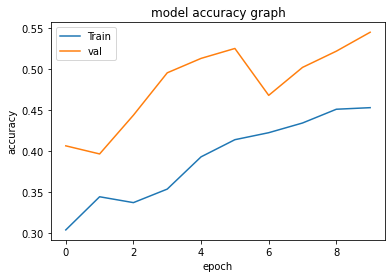

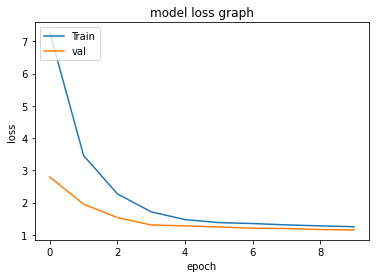

In [153]:
white_wine_temp = pd.read_csv("winequality-white.csv")
red_wine_temp = pd.read_csv("winequality-red.csv")
white_wine_temp['type'] = 0
red_wine_temp['type'] = 1
wine = pd.concat([white_wine_temp, red_wine_temp])

X_train_total, Y_train_total, X_test_total, Y_test_total = generate_data(wine, 0.7)
y_train_label = keras.utils.to_categorical(Y_train, 10)

model_type = keras.models.Sequential()
model_type.add(keras.layers.Flatten(input_shape=[13,]))

model_type.add(keras.layers.Dense(32, activation="relu"))
model_type.add(keras.layers.Dropout(0.2))

model_type.add(keras.layers.Dense(10, activation="softmax"))

model_type.summary()

model_type.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

history_total = model_type.fit(X_train_total, y_train_label,batch_size=32,epochs=10,verbose=2,validation_split=0.2)

visualization(history_total)